In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#from sympy.solvers import solve
%matplotlib inline
filename = "svar-set2.dat.txt"
X = []
Y = []
for line in open(filename):
    li=line.strip()
    if not li.startswith("#"):
        var = line.split()
        Y.append([float(var[-1])])
        X.append([float(i) for i in var[0:len(var)-1]])

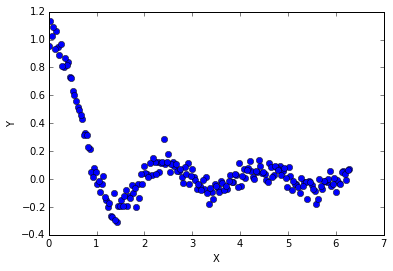

In [2]:
plt.plot(X,Y, 'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
Z = []
Z = X
for i in Z:
    i.insert(0,1)

In [4]:
'''To predict with polynomial = 3'''
poly = PolynomialFeatures(3)
newZ =poly.fit_transform(Z)

In [5]:
theta_simple = np.dot(np.linalg.pinv(np.array(newZ)),np.array(Y)) #this theta value is for the single paramter single polynomial data.
print theta_simple

[[ 0.24962549]
 [ 0.24962549]
 [-0.35189275]
 [ 0.24962549]
 [-0.35189275]
 [ 0.15842316]
 [ 0.24962549]
 [-0.35189275]
 [ 0.15842316]
 [-0.02845795]]


In [6]:
LP = LinearRegression()
LP1 = LinearRegression() #for in built functions.
LP.fit(np.array(newZ),np.array(Y)) #fitting the data using in-built functions.
print LP.coef_ #co-efficient of actual feature and not one in 1st column of Z.
#Conclusion: The values are the approximately the same as obtained using manual method.

[[  0.00000000e+00  -3.92257074e-17  -3.51892753e-01   6.38227373e-17
   -3.51892753e-01   1.58423163e-01  -4.14449672e-45  -3.51892753e-01
    1.58423163e-01  -2.84579505e-02]]


In [7]:
zlen = len(newZ) #size of data given.
k_folds = 10 #number of folds to be used.
tmp_list = [] #This list will contain the floor values obtained.
indices = [] #Using the floor values we are going to determine the indices that are going to be used for cross validation.
for i in range(k_folds):
    floor = zlen//k_folds
    tmp_list.append(floor)
ini =0 #initial value
for i in tmp_list:
    fin = ini + i #final value, final value will be used as intial value for the successive record.
    indices.append((ini,fin))
    ini = fin
#print indices

In [8]:
Zt = np.ndarray([]) #train
Ztst = [] #test
Yt = np.ndarray([])
Ytst = []
theta_cv = {}
Y_train_dict = {}
Z_train_dict = {}
Y_dict = {} # Contains Ytst in the form of a dictionary, for being able to handle it better with Keys.
Z_dict ={}  #Same as Y_dict{}
key =1
for i in indices:
    Ztst = newZ[i[0]:i[1]] #using the Z with polynomials with degree three
    Z_dict[key] = Ztst
    Ytst = Y[i[0]:i[1]]
    Y_dict[key] = Ytst
    for j in indices:
            if i != j:
                Zt = Zt + newZ[j[0]:j[1]]
                Z_train_dict[key] = Zt
                Yt = Yt + Y[j[0]:j[1]]
                Y_train_dict[key] = Yt
    theta_cv[key] = np.dot(np.linalg.pinv(Zt),Yt)
    key = key +1

In [9]:
#Predicting the values. Comparing the values obtained using theta_cv vs y_dict
predict ={}
for i in theta_cv:
    t_list = []
    for j in Z_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict[i] = t_list

In [10]:
predict_train = {}
for i in theta_cv:
    t_list = []
    for j in Z_train_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict_train[i] = t_list

In [11]:
MSE_test = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict[i],Y_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_test[i] = sumd/len(predict[i])

In [12]:
MSE_train = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict_train[i],Y_train_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_train[i] = sumd/len(predict_train[i])

In [13]:
print predict[1] ,'\n'
print Y_dict[1]

[array([ 0.43641378]), array([-0.00551135]), array([ 0.06879197]), array([ 0.07430659]), array([ 0.07162869]), array([-0.10836999]), array([-0.33334701]), array([ 0.05600398]), array([ 0.05940246]), array([-0.01365833]), array([ 0.0498794]), array([ 1.02174156]), array([ 0.46093933]), array([ 0.3667015]), array([ 0.08131408]), array([ 0.09005007]), array([ 0.08698259]), array([-0.11019354]), array([-0.01445727]), array([ 0.7120838])] 

[[0.3281640823970478], [-0.01318636434710183], [0.1312429212494962], [0.01440296550640596], [0.05434596097022962], [0.0591919910690206], [0.0579754374806327], [0.07324981691943128], [0.00548481963279009], [-0.1942255335845428], [-0.03925344756055267], [1.060532837817737], [0.3128823923967042], [0.2121746853914799], [0.05373187805811879], [-0.007168802987235975], [0.0913074516583969], [0.05937938955747971], [-0.06247720776741519], [0.7277765971247848]]


In [14]:
print MSE_train,'\n'
print MSE_test

{1: 0.15270381576392836, 2: 0.48407398308727395, 3: 1.0797546733819177, 4: 2.0493739885792399, 5: 3.3259026041589772, 6: 4.6296961267727541, 7: 6.3525139967388977, 8: 7.8798654975232321, 9: 9.8322815077540788, 10: 12.236288727917252} 

{1: 0.01666852235110167, 2: 0.026569899562506171, 3: 0.030248755504994063, 4: 0.034062107060351912, 5: 0.022228907273040853, 6: 0.03735564021661985, 7: 0.021690740024318114, 8: 0.034666040228301345, 9: 0.030981508807014967, 10: 0.026995930939542955}


In [15]:
print np.mean(MSE_train.values())
print np.mean(MSE_test.values())

4.80224549217
0.0281468051968


In [16]:
''' To predict with polynomial with degree = 4'''
poly = PolynomialFeatures(4)
newZ =poly.fit_transform(Z)

theta_simple = np.dot(np.linalg.pinv(np.array(Z)),np.array(Y)) #this theta value is for the single paramter single polynomial data.
#print theta_simple

#LP = LinearRegression()
#LP1 = LinearRegression() #for in built functions.
#LP.fit(np.array(Z),np.array(Y)) #fitting the data using in-built functions.
#print LP.coef_ #co-efficient of actual feature and not one in 1st column of Z.

zlen = len(newZ) #size of data given.
k_folds = 10 #number of folds to be used.
tmp_list = [] #This list will contain the floor values obtained.
indices = [] #Using the floor values we are going to determine the indices that are going to be used for cross validation.
for i in range(k_folds):
    floor = zlen//k_folds
    tmp_list.append(floor)
ini =0 #initial value
for i in tmp_list:
    fin = ini + i #final value, final value will be used as intial value for the successive record.
    indices.append((ini,fin))
    ini = fin
#print indices

Zt = np.ndarray([]) #train
Ztst = [] #test
Yt = np.ndarray([])
Ytst = []
theta_cv = {}
Y_train_dict = {}
Z_train_dict = {}
Y_dict = {} # Contains Ytst in the form of a dictionary, for being able to handle it better with Keys.
Z_dict ={}  #Same as Y_dict{}
key =1
for i in indices:
    Ztst = newZ[i[0]:i[1]] #using the Z with polynomials
    Z_dict[key] = Ztst
    Ytst = Y[i[0]:i[1]]
    Y_dict[key] = Ytst
    for j in indices:
            if i != j:
                Zt = Zt + newZ[j[0]:j[1]]
                Z_train_dict[key] = Zt
                Yt = Yt + Y[j[0]:j[1]]
                Y_train_dict[key] = Yt
    theta_cv[key] = np.dot(np.linalg.pinv(Zt),Yt)
    key = key +1

In [17]:
#Predicting the values. Comparing the values obtained using theta_cv vs y_dict
predict ={}
for i in theta_cv:
    t_list = []
    for j in Z_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict[i] = t_list

In [18]:
predict_train = {}
for i in theta_cv:
    t_list = []
    for j in Z_train_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict_train[i] = t_list

In [19]:
MSE_test = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict[i],Y_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_test[i] = sumd/len(predict[i])

In [20]:
MSE_train = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict_train[i],Y_train_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_train[i] = sumd/len(predict_train[i])

In [21]:
print MSE_train,'\n'
print MSE_test

{1: 0.096457719284747348, 2: 0.3247792393432597, 3: 0.67844698382840707, 4: 1.2439499623208254, 5: 1.9730054231507501, 6: 2.744601587785493, 7: 3.727668243226772, 8: 4.7820443423792067, 9: 5.941135760735067, 10: 7.3472437620662587} 

{1: 0.0056838601364318318, 2: 0.012282662112038437, 3: 0.01851740305200569, 4: 0.012919922575245144, 5: 0.011431254324390416, 6: 0.028279469432509606, 7: 0.011191732137179802, 8: 0.014292914277511712, 9: 0.020992415470229918, 10: 0.006829816018128182}


In [22]:
print np.mean(MSE_train.values())
print np.mean(MSE_test.values())

2.88593330241
0.0142421449536


In [23]:
'''To predict with polynomial = 3 with subset of  data'''
poly = PolynomialFeatures(3)
newZ1 = poly.fit_transform(Z[0:100])
Y_chunk = Y[0:100]

zlen = len(newZ1) #size of data given.
k_folds = 10 #number of folds to be used.
tmp_list = [] #This list will contain the floor values obtained.
indices = [] #Using the floor values we are going to determine the indices that are going to be used for cross validation.
for i in range(k_folds):
    floor = zlen//k_folds
    tmp_list.append(floor)
ini =0 #initial value
for i in tmp_list:
    fin = ini + i #final value, final value will be used as intial value for the successive record.
    indices.append((ini,fin))
    ini = fin
#print indices

Zt = np.ndarray([]) #train
Ztst = [] #test
Yt = np.ndarray([])
Ytst = []
theta_cv = {}
Y_train_dict = {}
Z_train_dict = {}
Y_dict = {} # Contains Ytst in the form of a dictionary, for being able to handle it better with Keys.
Z_dict ={}  #Same as Y_dict{}
key =1
for i in indices:
    Ztst = newZ1[i[0]:i[1]] #using the Z with polynomials with degree three
    Z_dict[key] = Ztst
    Ytst = Y_chunk[i[0]:i[1]]
    Y_dict[key] = Ytst
    for j in indices:
            if i != j:
                #print Zt.shape
                Zt = Zt + newZ1[j[0]:j[1]]
                Z_train_dict[key] = Zt
                Yt = Yt + Y_chunk[j[0]:j[1]]
                Y_train_dict[key] = Yt
    theta_cv[key] = np.dot(np.linalg.pinv(Zt),Yt)
    key = key +1

In [24]:
#Predicting the values. Comparing the values obtained using theta_cv vs y_dict
predict ={}
for i in theta_cv:
    t_list = []
    for j in Z_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict[i] = t_list
    
predict_train = {}
for i in theta_cv:
    t_list = []
    for j in Z_train_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict_train[i] = t_list

In [25]:
MSE_test = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict[i],Y_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_test[i] = sumd/len(predict[i])

MSE_train = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict_train[i],Y_train_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_train[i] = sumd/len(predict_train[i])

In [26]:
print MSE_train,'\n'
print MSE_test

{1: 0.12452043699759116, 2: 0.41567713912295207, 3: 0.72239881854306454, 4: 1.0265787230439405, 5: 1.7221547908755883, 6: 2.5283477738432225, 7: 3.8357207608641231, 8: 4.9991986374030954, 9: 6.4874438116771556, 10: 8.1821916033029378} 

{1: 0.014543948334030193, 2: 0.011601498224693616, 3: 0.024547730270623257, 4: 0.034917244760384276, 5: 0.02756576064454529, 6: 0.035921421924778034, 7: 0.021219121790208725, 8: 0.033898239602073631, 9: 0.021666129138839595, 10: 0.0048436229210579431}


In [27]:
print np.mean(MSE_train.values())
print np.mean(MSE_test.values())

3.00442324957
0.0230724717611


In [28]:
'''To predict with polynomial with degree 4 with subset of original data'''
poly = PolynomialFeatures(4)
newZ2 = poly.fit_transform(Z[0:100])
Y_chunk = Y[0:100]

zlen = len(newZ2) #size of data given.
k_folds = 10 #number of folds to be used.
tmp_list = [] #This list will contain the floor values obtained.
indices = [] #Using the floor values we are going to determine the indices that are going to be used for cross validation.
for i in range(k_folds):
    floor = zlen//k_folds
    tmp_list.append(floor)
ini =0 #initial value
for i in tmp_list:
    fin = ini + i #final value, final value will be used as intial value for the successive record.
    indices.append((ini,fin))
    ini = fin
#print indices

Zt = np.ndarray([]) #train
Ztst = [] #test
Yt = np.ndarray([])
Ytst = []
theta_cv = {}
Y_train_dict = {}
Z_train_dict = {}
Y_dict = {} # Contains Ytst in the form of a dictionary, for being able to handle it better with Keys.
Z_dict ={}  #Same as Y_dict{}
key =1
for i in indices:
    Ztst = newZ2[i[0]:i[1]] #using the Z with polynomials with degree three
    Z_dict[key] = Ztst
    Ytst = Y_chunk[i[0]:i[1]]
    Y_dict[key] = Ytst
    for j in indices:
            if i != j:
                #print Zt.shape
                Zt = Zt + newZ2[j[0]:j[1]]
                Z_train_dict[key] = Zt
                Yt = Yt + Y_chunk[j[0]:j[1]]
                Y_train_dict[key] = Yt
    theta_cv[key] = np.dot(np.linalg.pinv(Zt),Yt)
    key = key +1
    
#Predicting the values. Comparing the values obtained using theta_cv vs y_dict
predict ={}
for i in theta_cv:
    t_list = []
    for j in Z_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict[i] = t_list
    
predict_train = {}
for i in theta_cv:
    t_list = []
    for j in Z_train_dict[i]:
        t_list.append(np.dot(np.array(theta_cv[i]).transpose(),np.array(j)))
    predict_train[i] = t_list
    
#Finding MSE train and Test errors.
MSE_test = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict[i],Y_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_test[i] = sumd/len(predict[i])

MSE_train = {}
for i in Y_dict:
    sumd = 0
    for m,n in zip(predict_train[i],Y_train_dict[i]):
        sumd = sumd + (m[0]-n[0])**2
    MSE_train[i] = sumd/len(predict_train[i])

In [29]:
print MSE_train,'\n'
print MSE_test

{1: 0.062420198460228983, 2: 0.25532757881086698, 3: 0.49840904614714321, 4: 0.76216453382367444, 5: 1.2336445917229493, 6: 1.6758677021888311, 7: 2.3646808666658763, 8: 2.9229614304273706, 9: 3.5838458461314957, 10: 4.6041954042208282} 

{1: 0.0059045323838426162, 2: 0.0099297672723102429, 3: 0.0094321147955755327, 4: 0.017169084233459735, 5: 0.014045239639018681, 6: 0.020379406337653921, 7: 0.0082972813423571965, 8: 0.018643799436305793, 9: 0.0094844861131009404, 10: 0.014245249374061342}


In [30]:
print np.mean(MSE_train.values())
print np.mean(MSE_test.values())

1.79635171986
0.0127530960928
